# Scatter Plots with **pandas**

The purpose of this chapter is to demonstrate the **pandas** built-in functionality for creating scatter plots.

The financial task we will accomplish is demonstrating SPY's *implied leverage effect*:  when the market suffers losses, implied volatility increases; when the market experiences gains, implied volatility decreases.

Our measure of SPY implied volatility will be the VIX index.  To verify the above relationship, we will plot SPY daily returns against daily changes in the VIX for 2016Q1-2021Q2.

## Loading Packages

Let's begin by loading the packages we will need.

In [1]:
import pandas as pd
import yfinance as yf
%matplotlib inline

## Reading-In Data

Next, let's use **pandas_datareader** to read in the SPY and VIX data.

In [2]:
df_spy = yf.download(
    ['SPY', '^VIX'], start='2016-01-01', end='2021-06-30',
    auto_adjust=False, rounding=True
)
df_spy.head()

[*********************100%***********************]  2 of 2 completed


Price      Adj Close          Close           High            Low          
Ticker           SPY   ^VIX     SPY   ^VIX     SPY   ^VIX     SPY   ^VIX   
Date                                                                       
2016-01-04    171.35  20.70  201.02  20.70  201.03  23.36  198.59  20.67  \
2016-01-05    171.64  19.34  201.36  19.34  201.90  21.06  200.05  19.25   
2016-01-06    169.47  20.59  198.82  20.59  200.06  21.86  197.60  19.80   
2016-01-07    165.41  24.99  194.05  24.99  197.44  25.86  193.59  22.40   
2016-01-08    163.59  27.01  191.92  27.01  195.85  27.08  191.58  22.48   

Price         Open            Volume       
Ticker         SPY   ^VIX        SPY ^VIX  
Date                                       
2016-01-04  200.49  22.48  222353500    0  
2016-01-05  201.40  20.75  110845800    0  
2016-01-06  198.34  21.67  152112600    0  
2016-01-07  195.33  23.22  213436100    0  
2016-01-08  195.19  22.96  209817200    0

The following code cleans up the data by isolating the the `Close` prices, resetting the index, and then changing the column names

In [3]:
df_spy = df_spy['Close'].reset_index()
df_spy.rename_axis(None, axis=1, inplace=True)
df_spy.rename(columns={'Date':'date','SPY':'spy','^VIX':'vix'}, inplace=True)
df_spy.head()

date     spy    vix
0 2016-01-04  201.02  20.70
1 2016-01-05  201.36  19.34
2 2016-01-06  198.82  20.59
3 2016-01-07  194.05  24.99
4 2016-01-08  191.92  27.01

## Adding Returns and VIX Changes to `df_spy`

Let's add a `return` column to `df_spy`.

In [4]:
df_spy['return'] = df_spy['spy'] / df_spy['spy'].shift(1) - 1
df_spy.head()

date     spy    vix    return
0 2016-01-04  201.02  20.70       NaN
1 2016-01-05  201.36  19.34  0.001691
2 2016-01-06  198.82  20.59 -0.012614
3 2016-01-07  194.05  24.99 -0.023992
4 2016-01-08  191.92  27.01 -0.010977

Next, let's calculate the daily change in the VIX, and put it in a new column called `vix_chg`.

In [5]:
df_spy['vix_chng'] = df_spy['vix'].diff()
df_spy.head()

date     spy    vix    return  vix_chng
0 2016-01-04  201.02  20.70       NaN       NaN
1 2016-01-05  201.36  19.34  0.001691     -1.36
2 2016-01-06  198.82  20.59 -0.012614      1.25
3 2016-01-07  194.05  24.99 -0.023992      4.40
4 2016-01-08  191.92  27.01 -0.010977      2.02

The `return` column in `df_spy` is expressed as a decimal, so let's change the `vix` and `vix_chng` columns of `df_vix` to also be expressed as decimals.

In [6]:
df_spy['vix'] = df_spy['vix'] / 100
df_spy['vix_chng'] = df_spy['vix_chng'] / 100
df_spy.head()

date     spy     vix    return  vix_chng
0 2016-01-04  201.02  0.2070       NaN       NaN
1 2016-01-05  201.36  0.1934  0.001691   -0.0136
2 2016-01-06  198.82  0.2059 -0.012614    0.0125
3 2016-01-07  194.05  0.2499 -0.023992    0.0440
4 2016-01-08  191.92  0.2701 -0.010977    0.0202

## Scatter Plot

Now that we have our data wrangled, we are in position to use the `DataFrame.plot.scatter()` method to plot daily SPY return against daily changes in the VIX.

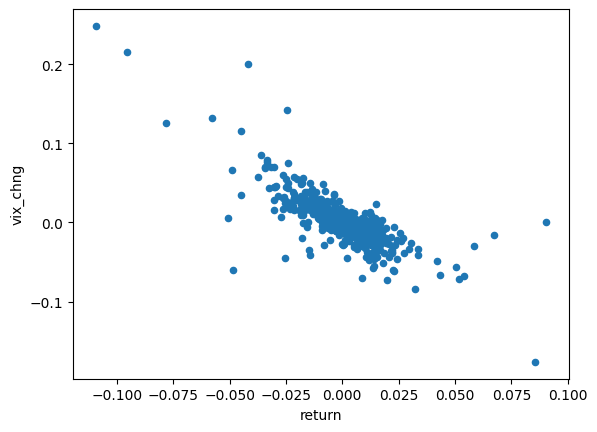

In [7]:
df_spy.plot.scatter('return', 'vix_chng');

The following code improves the aesthetics of our plot:

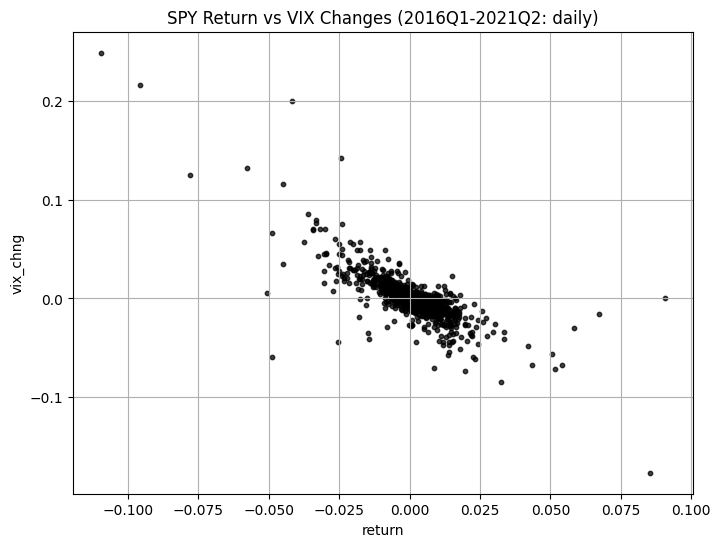

In [8]:
df_spy.plot.scatter(
    x = 'return',
    y = 'vix_chng',
    grid=True ,  
    c='k',
    alpha=0.75,
    s=10,  # changing the size of the dots
    figsize=(8, 6),
    title='SPY Return vs VIX Changes (2016Q1-2021Q2: daily)',
);